## Convirtiendo un pdf en imágenes

* Define your Documents: `PDFDocument` and `ImageDocument`.
* Define `saver` method for `ImageDocument`.

In [2]:
from document_transformer import Document

class PDFDocument(Document):
    """Custom class to PDF Documents"""

class ImageDocument(Document):
    """Custom class to Image Documents"""
    def saver(self, path):
        self.data.save(path)
        return self

Install `pdf2image` for this example

In [3]:
# !pip install pdf2image

* Define the `PDF2Images` transformer:
* Define input and output types:
* Define `transformer` method, that take input PDF documents and convert them into images (one for each page).
* Optionally, you can insert some `metadata` for each image page, but it's important to define the `data` to be saved.

In [4]:
from document_transformer import DocumentTransformer
import pdf2image
from typing import List
from pathlib import Path

class PDF2Images(DocumentTransformer):
    input: PDFDocument = None
    output: List[ImageDocument] = []

    def transformer(self) -> List[ImageDocument]:
        """Split the PDF document into pages"""
        images = pdf2image.convert_from_path(self.input.path)
        return [
            ImageDocument(
                metadata={'pdf_path': Path(self.input.path).name, 'page': i+1, 'size': image.size},
                data=image,
            )
            for i, image in enumerate(images)
        ]

Play! use your document transformer

In [5]:
pdf_doc = PDFDocument(path="document.pdf")
images = PDF2Images(input=pdf_doc).run()

for image in images:
    image.save(path=f'images/pag_{image.metadata["page"]}.jpg')
    print(f"Imagen: {image.id}")
    print(f"Parents: {image.parents}")
    print(f"Metadata: {image.metadata}")

Imagen: 8b97f4f1-1fe3-4702-ab0a-0ca2eb70fcd6
Parents: {'8a185067-f5da-4069-9f0d-488ab647a5ea'}
Metadata: {'pdf_path': 'document.pdf', 'page': 1, 'size': (1700, 2200)}
Imagen: 2169329b-7bad-441a-b29e-6eca1811f3a3
Parents: {'8a185067-f5da-4069-9f0d-488ab647a5ea'}
Metadata: {'pdf_path': 'document.pdf', 'page': 2, 'size': (1700, 2200)}
Imagen: 265d7a84-67d3-43aa-9b43-395a6adc55f0
Parents: {'8a185067-f5da-4069-9f0d-488ab647a5ea'}
Metadata: {'pdf_path': 'document.pdf', 'page': 3, 'size': (1700, 2200)}


* If you prefier, you can define a `Pipeline`.
* In a list insert each transformer and plot it!

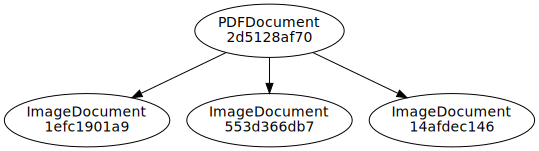

In [6]:
from document_transformer import Pipeline
from document_transformer.utils import plot_graph

# Define Pipeline, add more transformers as you need
pipeline = Pipeline(transformers=[
    PDF2Images(to="images/pag_{metadata[page]}.jpg"),
    # Images2Markdown(to="images/pag_{metadata[page]}.md")),
    # ...
])

# Define input and get output
pdf_doc = PDFDocument(path="document.pdf")
images = pipeline.run(input=pdf_doc)

# See transfomer plot graph
plot_graph(pipeline.get_traces())